In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.express as px

In [2]:
df = pd.read_csv("archive/database.csv", low_memory=False)
df = df.replace("n-a", np.nan)
df = df.replace("n", np.nan)

In [3]:
df.isnull().any()

Country        False
Uri            False
Popularity     False
Title           True
Artist          True
               ...  
USA            False
Popu_max       False
Top10_dummy    False
Top50_dummy    False
Cluster        False
Length: 151, dtype: bool

In [4]:
for col in df.columns:
#     print(col, df[col].isnull().values.any())
    print(f"{col:30s} {df[col].isnull().values.sum():4.1f}")

Country                         0.0
Uri                             0.0
Popularity                      0.0
Title                           5.0
Artist                          5.0
Album/Single                    5.0
Genre                          3952.0
Artist_followers               46.0
Explicit                        5.0
Album                           5.0
Release_date                    5.0
Track_number                    5.0
Tracks_in_album                 5.0
danceability                   19.0
energy                         19.0
key                            19.0
loudness                       19.0
mode                           19.0
speechiness                    19.0
acoustics                      19.0
instrumentalness               19.0
liveliness                     19.0
valence                        19.0
tempo                          19.0
duration_ms                    19.0
time_signature                 19.0
Genre_new                       0.0
Days_since_release        

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170633 entries, 0 to 170632
Columns: 151 entries, Country to Cluster
dtypes: float64(58), int64(65), object(28)
memory usage: 196.6+ MB


In [6]:
# Count does not include null values

dtypes = []
non_missing_vals = []
for column in df.columns:
    non_missing_vals.append(df[column].count())
    dtypes.append(df[column].dtype)

In [7]:
df_info = pd.DataFrame({'Features':df.columns, 'Dtype':dtypes, 'Non-Null Values':non_missing_vals})
df_info.head()

,Features,Dtype,Non-Null Values
0,Country,object,170633
1,Uri,object,170633
2,Popularity,float64,170633
3,Title,object,170628
4,Artist,object,170628


In [8]:
df_info[df_info['Dtype']=='object']

,Features,Dtype,Non-Null Values
0,Country,object,170633
1,Uri,object,170633
3,Title,object,170628
4,Artist,object,170628
5,Album/Single,object,170628
6,Genre,object,166681
7,Artist_followers,object,170587
8,Explicit,object,170628
9,Album,object,170628
10,Release_date,object,170628


In [9]:
# Return a Series containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element
# Excludes NA values by default.
df['Country'].value_counts()

Switzerland    7686
Taiwan         7594
Sweden         6970
Germany        6942
Finland        6783
Netherlands    6697
USA            6645
UK             6540
Austria        6530
France         6449
Norway         6074
Belgium        6038
Canada         5635
Global         5461
Ireland        5371
Poland         5273
Denmark        5234
Italy          5219
Portugal       4589
Spain          4288
Australia      4034
Malaysia       3902
Singapore      3623
New Zealand    3591
Chile          3500
Turkey         3365
Brazil         3318
Colombia       3216
Indonesia      3070
Argentina      3021
Costa Rica     2975
Mexico         2833
Philippines    2806
Peru           2701
Ecuador        2660
Name: Country, dtype: int64

In [15]:
### Typecasting

df['danceability'] = pd.to_numeric(df['danceability'])
df['Artist_followers'] = pd.to_numeric(df['Artist_followers'])
df['Release_date'] = pd.to_datetime(df['Release_date'])
df['year'] = pd.DatetimeIndex(df['Release_date']).year

In [16]:
data = df[df['Country'].isin(['Switzerland', 'Sweden', 'USA', 'UK'])]

In [17]:
data.shape

(27841, 152)

In [18]:
spotify_api_data = data[['Country', 'Uri', 'Popularity',"Title","Artist","Album/Single","Genre","Artist_followers",
"Explicit","Album","Release_date","Track_number","Tracks_in_album","danceability","energy","key","loudness","mode",
"speechiness","acoustics","instrumentalness","liveliness","valence","tempo","duration_ms","time_signature",
"Genre_new","Days_since_release","Released_after_2017","Explicit_false","Explicit_true","album","compilation"]] 

In [19]:
spotify_api_data.describe()

,Popularity,Artist_followers,danceability,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,album,compilation
count,27841.000000,2.783500e+04,27838.000000,27289.000000,27289.000000,27841.000000,27841.000000,27841.000000,27841.000000
mean,3780.768408,7.816099e+06,0.668301,1368.213786,0.861776,0.547753,0.452247,0.579649,0.011853
std,10137.022559,1.235554e+07,0.148615,2695.695619,0.345141,0.497723,0.497723,0.493624,0.108226
min,0.800000,0.000000e+00,0.080700,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66.400000,4.226220e+05,0.575000,386.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,339.200000,2.691848e+06,0.682000,771.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,2255.500000,9.442830e+06,0.776000,1184.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,189351.850000,7.178310e+07,0.980000,44128.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
data['Country'].unique()

array(['USA', 'Switzerland', 'UK', 'Sweden'], dtype=object)

In [21]:
usa_data = data[data['Country']=="USA"]
swiss_data = data[data['Country']=="Switzerland"]
uk_data = data[data['Country']=="UK"]
swedish_data = data[data['Country']=='Sweden']

<AxesSubplot:xlabel='Popularity', ylabel='Density'>

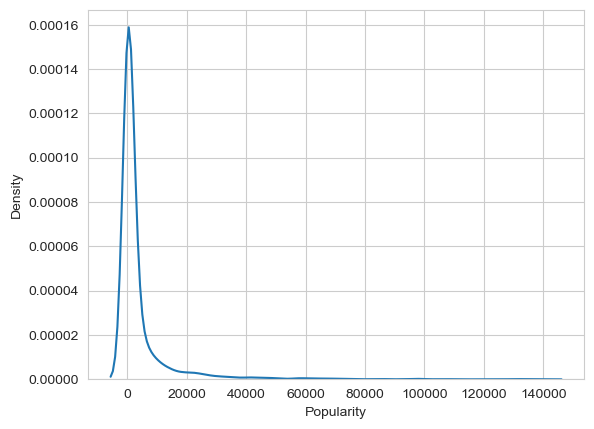

In [23]:
sb.set_style('whitegrid')
sb.kdeplot(usa_data['Popularity'])

<AxesSubplot:xlabel='Popularity', ylabel='Density'>

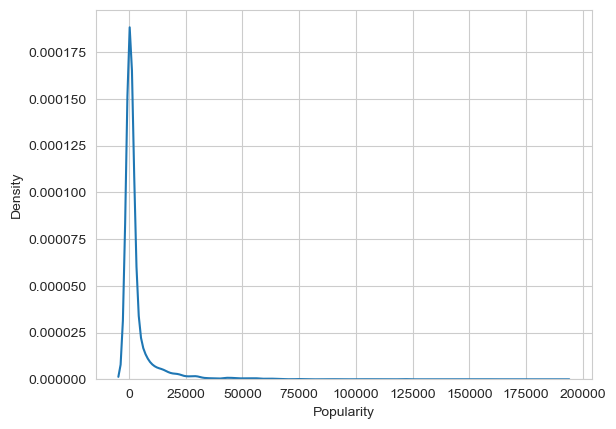

In [24]:
sb.set_style('whitegrid')
sb.kdeplot(swiss_data['Popularity'])

<AxesSubplot:xlabel='Popularity', ylabel='Density'>

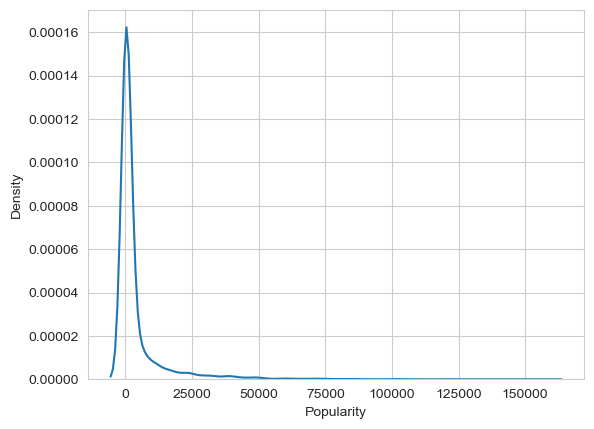

In [25]:
sb.set_style('whitegrid')
sb.kdeplot(uk_data['Popularity'])

<AxesSubplot:xlabel='Popularity', ylabel='Density'>

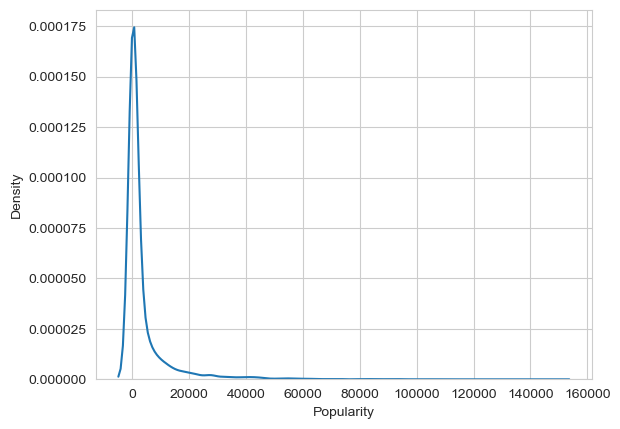

In [27]:
sb.set_style('whitegrid')
sb.kdeplot(swedish_data['Popularity'])

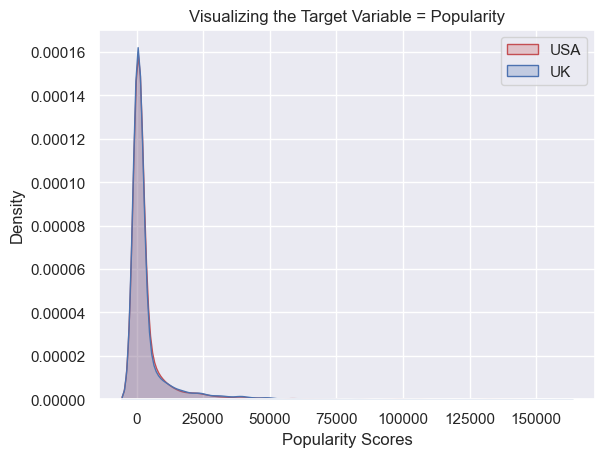

In [53]:
sb.set(style="darkgrid")
 
# plotting both distibutions on the same figure
fig = sb.kdeplot(usa_data['Popularity'], fill=True, color="r", label = "USA")
fig = sb.kdeplot(uk_data['Popularity'], fill=True, color="b", label = "UK")
plt.title("Visualizing the Target Variable = Popularity")
plt.xlabel("Popularity Scores")
plt.legend()
plt.show()

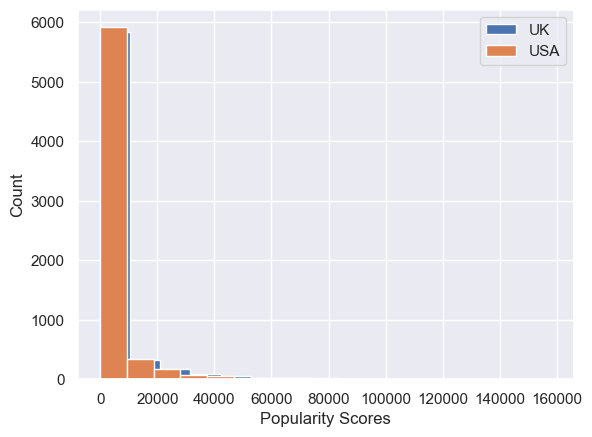

In [50]:
plt.hist(uk_data['Popularity'], bins = 15, label = "UK")
plt.hist(usa_data['Popularity'], bins= 15, label = "USA")
plt.xlabel("Popularity Scores")
plt.ylabel("Count")
plt.legend()
plt.show()